# ANÁLISIS DE COMPONENTES PRINCIPALES PARA CONSTRUIR EL ÍNDICE DE INCLUSIÓN FINANCIERA

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# pip install openpyxl

### Normalizamos las variables para que esten en una escala similar

### Observamos los gráficos de las variables de las dimensiones de inclusión financiera

### Ahora estimamos el Findex mediante PCA

In [10]:
from sklearn.decomposition import PCA

### OJO: Queda pendiente interpretar los coeficientes de cada variable y su peso en cada componente

In [35]:
print(principal_components[:1])

[[-6.32258366 -3.57052315  0.69725495  0.88082085 -0.23391135  0.56511339
  -0.3520288   0.00899234 -0.01038854  0.0747513 ]]


### Parece que el código interpreta de manera diferente pca.components y principal_components, queda pendiente averiguar por qué y verificarlo utilizando STATA

#### Empleamos el PC1 y PC2 que son los que explican el 91% de la variación de los datos. Utilizaremos un promedio ponderado de los coeficientes de cada componente para hallar los pesos relativos de cada variables y armar el Findex. Para ello, multiplicamos cada PC por su varianza respectiva, sumamos los resultados y divimos entre el total de la varianza explicada. 

#### A la fecha (21/04/25) utilizamos estos datos para sacar variaciones porcentuales e introducirlas en el modelo empírico ya que utilizando el índice reescalado mediante min-max produce estimaciones poco confiables. Se sospecha que es por la escala del 0 al 1 del índice realzado por min-max.

#### De igual modo, es posible que empleando menos dimensiones de las propuestas y construir un índice distinto podría mejorar los resultados, queda pendiente averiguarlo.

In [58]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# Realizamos el ajuste y la transformación para la columna de interés
# index_df['Inclusión financiera'] = scaler.fit_transform(index_df[['Inclusión financiera']])

# Verificar el resultado
# print(index_df.head())

In [57]:
# Para hacer el gráfico del FINDEX reescalado con min-max copiar el codigo de arriba

# Comparación del FINDEX con las otras variables

### Queda pendiente analizar el mapa de calor con variaciones porcentuales y sin incluir las variables que finalmente no fueron utilizadas en el modelo empírico.

### Asi mismo, es necesario revisar el paper donde se emplea el estimador Areballo-Bond para encontrar el conjunto de variables que optimiza las estimaciones a fin de comparar resultados entre diferentes modelos.

# APLICANDO PCA A CADA SUBDIMENSION (acorde a la reunión con asesor del 5/05)

In [20]:
# 1. Cargar los datos desde un archivo Excel
data = pd.read_excel("C:/Users/Tobby/OneDrive/Desktop/GABO/TESIS/Tesis-paper/Data y gráficos/PCA/Data inclusion financiera.xlsx")
data['Fecha'] = pd.to_datetime(data['Fecha'], format='%d/%m/%y')

# 2. Establecer datos, normalizar y pegar fecha
numeric_data = data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')  # Convertir columnas numéricas

scaler = StandardScaler()
normalized = pd.DataFrame(
    scaler.fit_transform(numeric_data),  # Normalizar solo los valores
    columns=numeric_data.columns  # Mantener nombres de columnas
)

normalized.index = data['Fecha'].values
normalized.index.name = 'Fecha'
normalized

,MOR_CONS,MOR_HIP,MOR_MICR,DEBTORS,CRED_CONS,CRED_HIP,CRED_MICR,DEPO,CRED,OFIC
Fecha,,,,,,,,,,
2001-03-31,-4.047296,-2.919650,-3.018114,-1.627806,-1.312671,-1.236295,-1.725332,-1.111814,-0.984277,-1.436736
2001-06-30,-3.708066,-2.903122,-3.161931,-1.610266,-1.346948,-1.244765,-1.680486,-1.104486,-0.999004,-1.409869
2001-09-30,-3.665662,-2.798449,-3.463946,-1.597141,-1.382113,-1.251557,-1.783729,-1.098232,-1.050588,-1.406424
2001-12-31,-3.205279,-2.506465,-3.502298,-1.564044,-1.380894,-1.215844,-1.712207,-1.089888,-1.052160,-1.386445
2002-03-31,-2.532876,-2.434846,-3.090023,-1.551102,-1.379319,-1.220916,-1.714978,-1.128997,-1.070139,-1.390579
...,...,...,...,...,...,...,...,...,...,...
2021-09-30,0.205195,-0.446050,0.419108,1.160362,1.168920,1.530030,0.559794,1.832962,1.654228,0.880774
2021-12-31,0.556541,-0.319340,0.682772,1.227353,1.341028,1.576971,0.860384,1.777817,1.701191,0.844950
2022-03-31,0.647406,-0.242212,0.380756,1.302639,1.532971,1.599153,0.813992,1.630451,1.664036,0.829794


<Figure size 200x100 with 0 Axes>

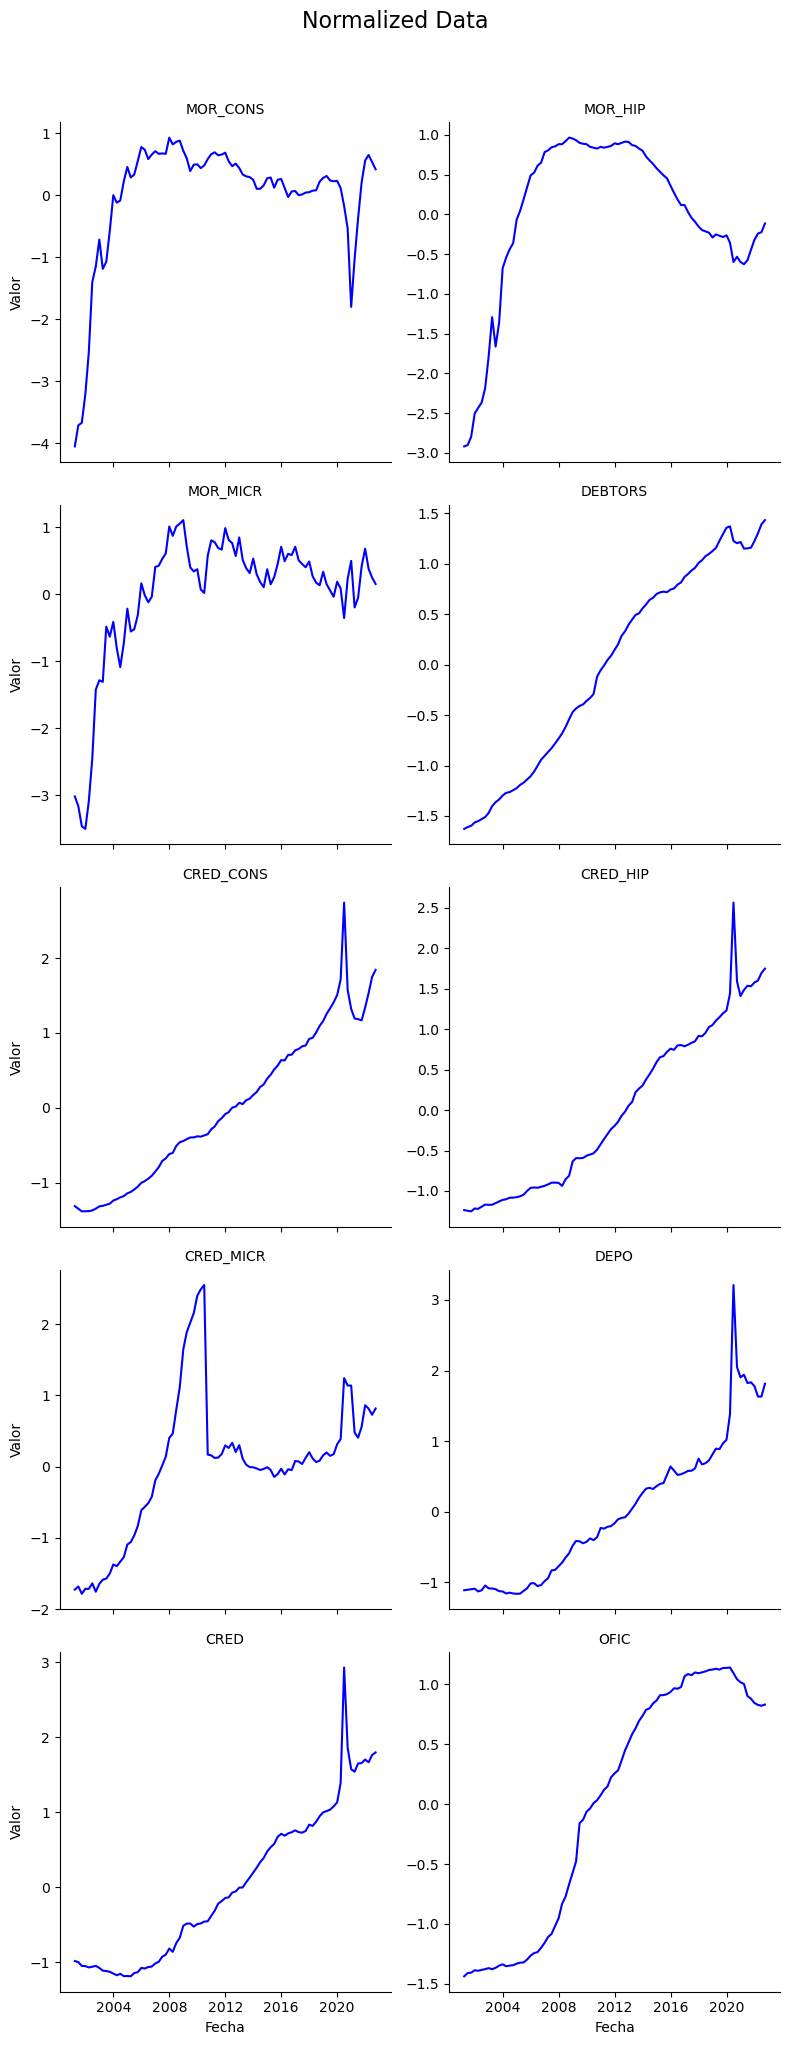

In [21]:
# Transforma el DataFrame a formato largo
normalized_long = normalized.reset_index().melt(id_vars='Fecha', var_name='Variable', value_name='Valor')

# Crear la figura con el gráfico
plt.figure(figsize=(2,1))
g1 = sns.FacetGrid(normalized_long, col='Variable', col_wrap=2, sharey=False, sharex=True, height=4)
g1.map(sns.lineplot, 'Fecha', 'Valor', color='blue')
g1.set_titles("{col_name}")
g1.set_axis_labels("Fecha", "Valor")
g1.fig.suptitle("Normalized Data", fontsize=16, y=1.02)
g1.tight_layout()

# Mostrar el gráfico
plt.show()

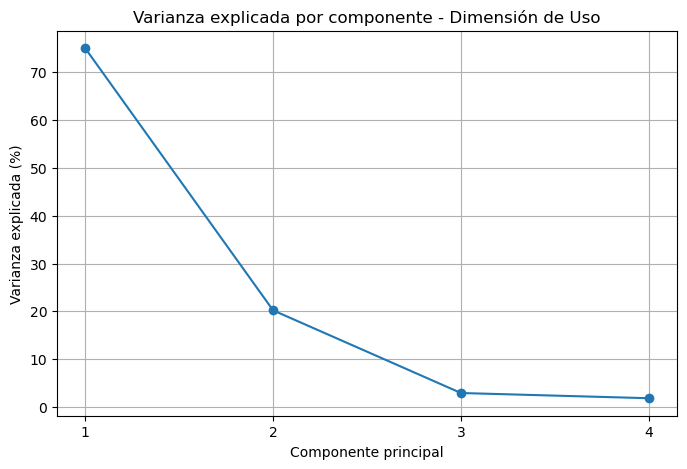

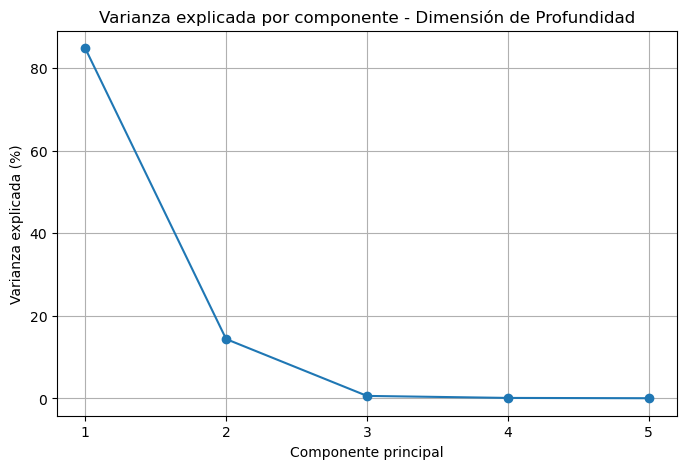

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Definir bloques
bloque_uso = ['MOR_CONS', 'MOR_HIP', 'MOR_MICR', 'DEBTORS']
bloque_profundidad = ['CRED_CONS', 'CRED_HIP', 'CRED_MICR','DEPO', 'CRED']
# bloque_acceso = ['OFIC']  # Este se excluye del PCA

# Crear función para aplicar PCA y graficar varianza explicada
def aplicar_pca_y_graficar(bloque, nombre_bloque):
    pca = PCA()
    componentes = pca.fit_transform(normalized[bloque])
    
    # Graficar varianza explicada
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
             pca.explained_variance_ratio_ * 100, marker='o')
    plt.title(f'Varianza explicada por componente - {nombre_bloque}')
    plt.xlabel('Componente principal')
    plt.ylabel('Varianza explicada (%)')
    plt.grid(True)
    plt.xticks(range(1, len(bloque) + 1))
    plt.show()
    
    return pca, componentes

# Aplicar PCA a cada bloque
pca_uso, componentes_uso = aplicar_pca_y_graficar(bloque_uso, "Dimensión de Uso")
pca_profundidad, componentes_profundidad = aplicar_pca_y_graficar(bloque_profundidad, "Dimensión de Profundidad")


In [8]:
import numpy as np

In [23]:
def construir_indice_por_componentes(componentes, explained_variance_ratio, nombre_bloque, fechas):
    # Tomar solo los dos primeros componentes y su varianza explicada
    pcs = componentes[:, :2]
    var_ratio = explained_variance_ratio[:2]
    
    # Calcular el índice como el promedio ponderado por varianza explicada
    index_values = np.average(pcs, axis=1, weights=var_ratio)
    
    # Crear DataFrame con nombre adecuado y fechas como índice
    index_df = pd.DataFrame(index_values, columns=[nombre_bloque], index=fechas)
    return index_df

In [26]:
# Crear índices para cada bloque
USO_INDEX = construir_indice_por_componentes(componentes_uso, pca_uso.explained_variance_ratio_, 'USO_INDEX', normalized.index)
PROF_INDEX = construir_indice_por_componentes(componentes_profundidad, pca_profundidad.explained_variance_ratio_, 'PROF_INDEX', normalized.index)

In [27]:
# Unir los tres indicadores en un solo DataFrame
bloques_combinados = pd.concat([
    USO_INDEX,
    PROF_INDEX,
    normalized[['OFIC']]
], axis=1)

bloques_combinados.columns = ['USO_INDEX', 'PROF_INDEX', 'ACCESO']  # renombrar por claridad
print(bloques_combinados.head())

            USO_INDEX  PROF_INDEX    ACCESO
Fecha                                      
2001-03-31  -4.603039   -2.468679 -1.436736
2001-06-30  -4.530596   -2.471272 -1.409869
2001-09-30  -4.607241   -2.544778 -1.406424
2001-12-31  -4.337979   -2.500718 -1.386445
2002-03-31  -3.877703   -2.525311 -1.390579


In [29]:
from sklearn.decomposition import PCA

# Aplicar PCA sobre los tres indicadores
pca_final = PCA()
componentes_final = pca_final.fit_transform(bloques_combinados)

In [30]:
# Ver la varianza explicada por cada componente
for i, var in enumerate(pca_final.explained_variance_ratio_):
    print(f"Componente {i+1}: {var:.4f} varianza explicada")

Componente 1: 0.8259 varianza explicada
Componente 2: 0.1538 varianza explicada
Componente 3: 0.0203 varianza explicada


In [31]:
# Tomar los dos primeros componentes y sus proporciones de varianza
pc_final_2 = componentes_final[:, :2]
var_ratio_final_2 = pca_final.explained_variance_ratio_[:2]

# Índice final como promedio ponderado
indice_general = np.average(pc_final_2, axis=1, weights=var_ratio_final_2)

# Guardar en un DataFrame
INCLUSION_INDEX = pd.DataFrame(indice_general, columns=["FINDEX"], index=bloques_combinados.index)

df_findex_dim = pd.concat([bloques_combinados, INCLUSION_INDEX], axis=1)
print(df_findex_dim.head())

            USO_INDEX  PROF_INDEX    ACCESO    FINDEX
Fecha                                                
2001-03-31  -4.603039   -2.468679 -1.436736 -4.412912
2001-06-30  -4.530596   -2.471272 -1.409869 -4.365618
2001-09-30  -4.607241   -2.544778 -1.406424 -4.448490
2001-12-31  -4.337979   -2.500718 -1.386445 -4.268518
2002-03-31  -3.877703   -2.525311 -1.390579 -4.030292


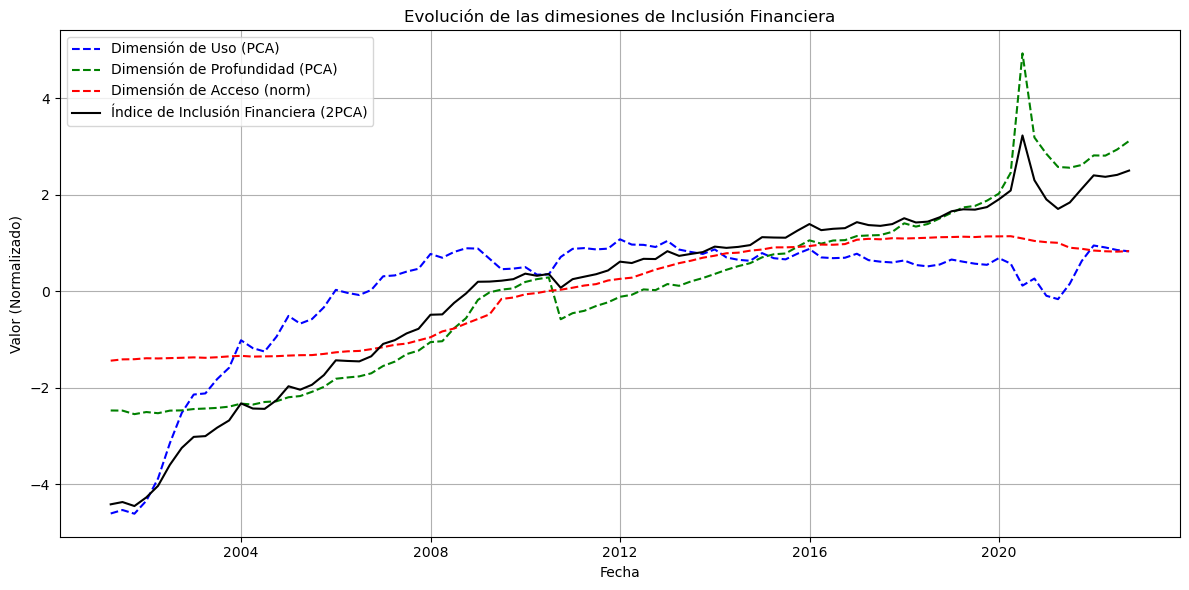

In [34]:
plt.figure(figsize=(12, 6))

# Graficar los dos índices
plt.plot(df_findex_dim.index, df_findex_dim['USO_INDEX'], label='Dimensión de Uso (PCA)', color='blue', linestyle='--')
plt.plot(df_findex_dim.index, df_findex_dim['PROF_INDEX'], label='Dimensión de Profundidad (PCA)', color='green', linestyle='--')
plt.plot(df_findex_dim.index, df_findex_dim['ACCESO'], label='Dimensión de Acceso (norm)', color='red', linestyle='--')
plt.plot(df_findex_dim.index, df_findex_dim['FINDEX'], label='Índice de Inclusión Financiera (2PCA)', color='black')

# Personalización del gráfico
plt.title('Evolución de las dimesiones de Inclusión Financiera')
plt.xlabel('Fecha')
plt.ylabel('Valor (Normalizado)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
# Guardar los datos en un archivo Excel
df_findex_dim.to_excel("C:/Users/Tobby/OneDrive/Desktop/GABO/TESIS/Tesis-paper/Data y gráficos/PCA/Data IF 2PCA 2.xlsx", index=True)

In [37]:
from sklearn.preprocessing import MinMaxScaler

# Crear el escalador
scaler = MinMaxScaler()

# Aplicar el escalado min-max a todas las columnas
df_findex_scaled = pd.DataFrame(
    scaler.fit_transform(df_findex_dim),
    columns=df_findex_dim.columns,
    index=df_findex_dim.index
)

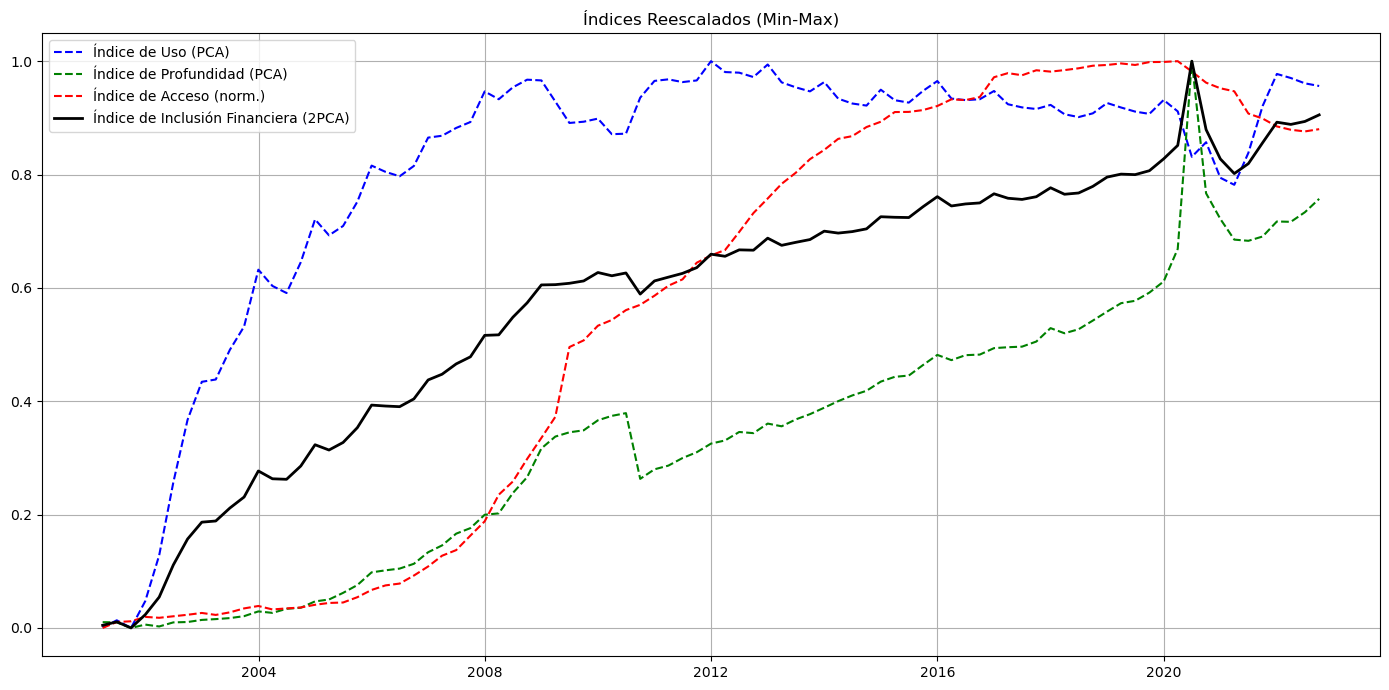

In [38]:
plt.figure(figsize=(14, 7))

# Graficar cada índice reescalado
plt.plot(df_findex_scaled.index, df_findex_scaled['USO_INDEX'], label='Índice de Uso (PCA)', color='blue', linestyle='--')
plt.plot(df_findex_scaled.index, df_findex_scaled['PROF_INDEX'], label='Índice de Profundidad (PCA)', color='green', linestyle='--')
plt.plot(df_findex_scaled.index, df_findex_scaled['ACCESO'], label='Índice de Acceso (norm.)', color='red', linestyle='--')
plt.plot(df_findex_scaled.index, df_findex_scaled['FINDEX'], label='Índice de Inclusión Financiera (2PCA)', color='black', linewidth=2)

# Personalizar
plt.title('Índices Reescalados (Min-Max)')
# plt.xlabel('Fecha')
# plt.ylabel('Escala [0, 1]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
df_findex_scaled.to_excel("C:/Users/Tobby/OneDrive/Desktop/GABO/TESIS/Tesis-paper/Data y gráficos/Gráficos de Tesis/Sin tendencia/Quitar tendencia 2.xlsx", index=True)

# Gráfico de variables en niveles y variaciones

In [39]:
# Leer hojas de niveles y variaciones
ruta = "C:/Users/Tobby/OneDrive/Desktop/GABO/TESIS/Tesis-paper/Data y gráficos/PCA/Data nivel-var 2.xlsx"
niveles = pd.read_excel(ruta, sheet_name="Niveles", parse_dates=[0])
variaciones = pd.read_excel(ruta, sheet_name="Sin tendencia", parse_dates=[0])

# Asegurar que el índice sea la fecha
niveles.set_index(niveles.columns[0], inplace=True)
variaciones.set_index(variaciones.columns[0], inplace=True)

In [40]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

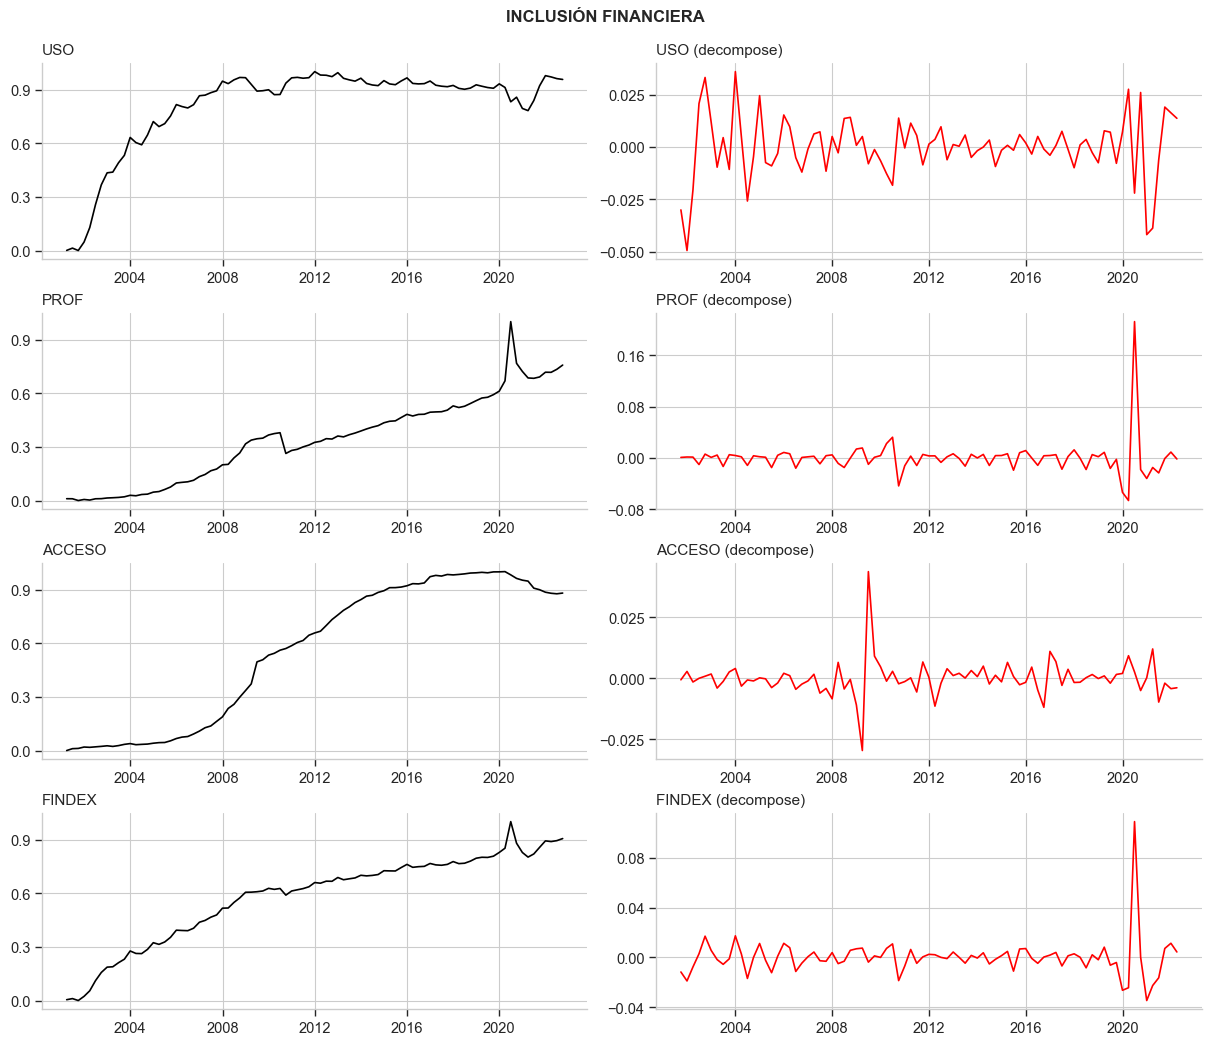

In [67]:
# Estilo sobrio tipo paper
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("paper", font_scale=1.2)

# Definir bloques y variables
bloques = {
    "Inclusión financiera": ["USO", "PROF", "ACCESO", "FINDEX"],
}

# Graficar cada bloque
for nombre_bloque, variables in bloques.items():
    n = len(variables)
    fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(12, 2.5 * n), constrained_layout=True)

    if n == 1:
        axes = [axes]  # Para mantener compatibilidad cuando n=1

    for i, var in enumerate(variables):
        # Nivel
        axes[i][0].plot(niveles.index, niveles[var], color='black', linewidth=1.2)
        axes[i][0].set_title(f"{var}", loc='left', fontsize=11)
        axes[i][0].tick_params(axis='x', labelrotation=0)
        axes[i][0].spines[['top', 'right']].set_visible(False)

        # Variación
        axes[i][1].plot(variaciones.index, variaciones[var], color='red', linewidth=1.2)
        axes[i][1].set_title(f"{var} (decompose)", loc='left', fontsize=11)
        axes[i][1].tick_params(axis='x', labelrotation=0)
        axes[i][1].spines[['top', 'right']].set_visible(False)

        # Mejorar legibilidad en eje y
        for ax in axes[i]:
            ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=4))

    # Título del bloque
   # Título del bloque
    fig.suptitle(nombre_bloque.upper(), fontsize=12, fontweight='bold', y=1.03)

plt.show()


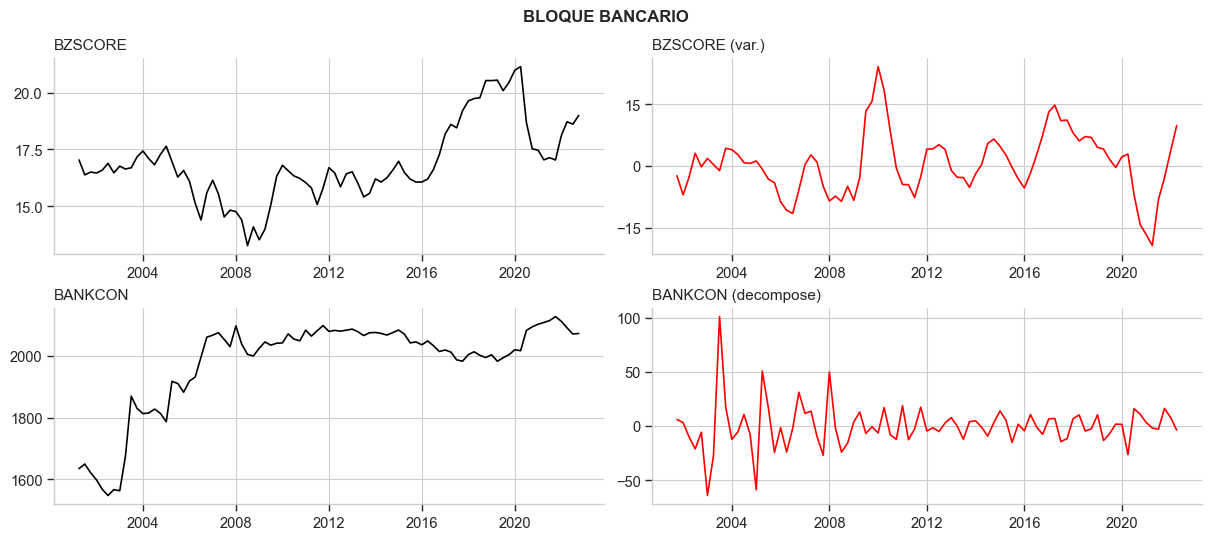

In [64]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("paper", font_scale=1.2)

# Variables
variables = ["BZSCORE", "BANKCON"]
n = len(variables)

# Crear figura y ejes
fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(12, 2.5 * n), constrained_layout=True)

# Si solo hay una variable, asegurar que axes sea indexable
if n == 1:
    axes = [axes]

# === Variable 1: BZSCORE ===
axes[0][0].plot(niveles.index, niveles["BZSCORE"], color='black', linewidth=1.2)
axes[0][0].set_title("BZSCORE", loc='left', fontsize=11)
axes[0][0].tick_params(axis='x', labelrotation=0)
axes[0][0].spines[['top', 'right']].set_visible(False)

axes[0][1].plot(variaciones.index, variaciones["BZSCORE"], color='red', linewidth=1.2)
axes[0][1].set_title("BZSCORE (var.)", loc='left', fontsize=11)
axes[0][1].tick_params(axis='x', labelrotation=0)
axes[0][1].spines[['top', 'right']].set_visible(False)

for ax in axes[0]:
    ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=4))

# === Variable 2: BANKCON ===
axes[1][0].plot(niveles.index, niveles["BANKCON"], color='black', linewidth=1.2)
axes[1][0].set_title("BANKCON", loc='left', fontsize=11)
axes[1][0].tick_params(axis='x', labelrotation=0)
axes[1][0].spines[['top', 'right']].set_visible(False)

axes[1][1].plot(variaciones.index, variaciones["BANKCON"], color='red', linewidth=1.2)

# 🔽 AQUÍ puedes editar libremente el subtítulo del gráfico de variación
axes[1][1].set_title("BANKCON (decompose)", loc='left', fontsize=11)

axes[1][1].tick_params(axis='x', labelrotation=0)
axes[1][1].spines[['top', 'right']].set_visible(False)

for ax in axes[1]:
    ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=4))

# Título del bloque
fig.suptitle("BLOQUE BANCARIO", fontsize=12, fontweight='bold', y=1.05)

plt.show()


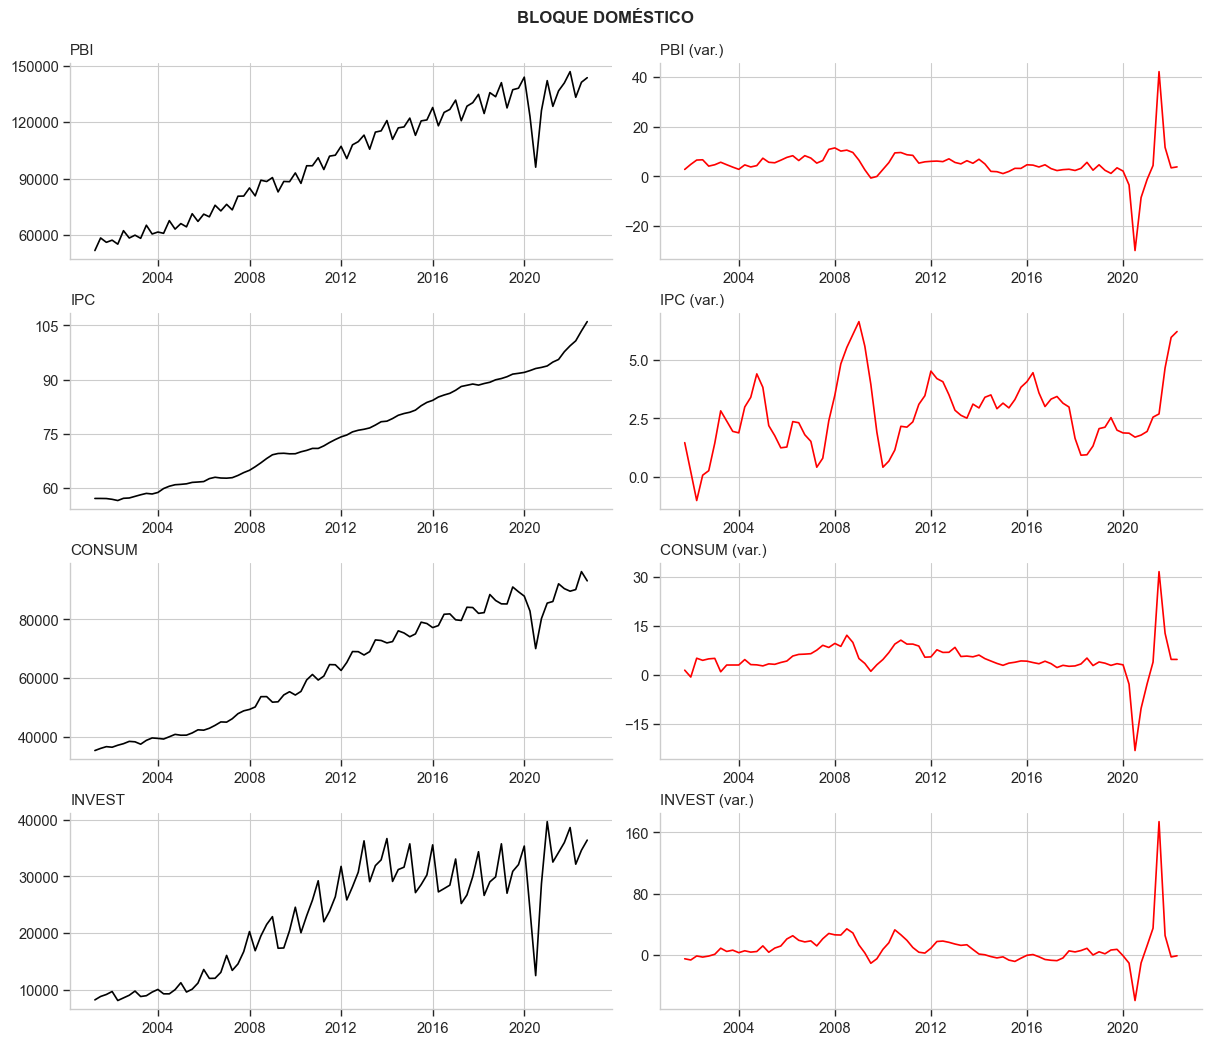

In [ ]:
# Estilo sobrio tipo paper
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("paper", font_scale=1.2)

# Definir bloques y variables
bloques = {
    "Bloque doméstico": ["PBI", "IPC", "CONSUM", "INVEST"],
}

# Graficar cada bloque
for nombre_bloque, variables in bloques.items():
    n = len(variables)
    fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(12, 2.5 * n), constrained_layout=True)

    if n == 1:
        axes = [axes]  # Para mantener compatibilidad cuando n=1

    for i, var in enumerate(variables):
        # Nivel
        axes[i][0].plot(niveles.index, niveles[var], color='black', linewidth=1.2)
        axes[i][0].set_title(f"{var}", loc='left', fontsize=11)
        axes[i][0].tick_params(axis='x', labelrotation=0)
        axes[i][0].spines[['top', 'right']].set_visible(False)

        # Variación
        axes[i][1].plot(variaciones.index, variaciones[var], color='red', linewidth=1.2)
        axes[i][1].set_title(f"{var} (var.)", loc='left', fontsize=11)
        axes[i][1].tick_params(axis='x', labelrotation=0)
        axes[i][1].spines[['top', 'right']].set_visible(False)

        # Mejorar legibilidad en eje y
        for ax in axes[i]:
            ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=4))

    # Título del bloque
    fig.suptitle(nombre_bloque.upper(), fontsize=12, fontweight='bold', y=1.03)
    plt.show()


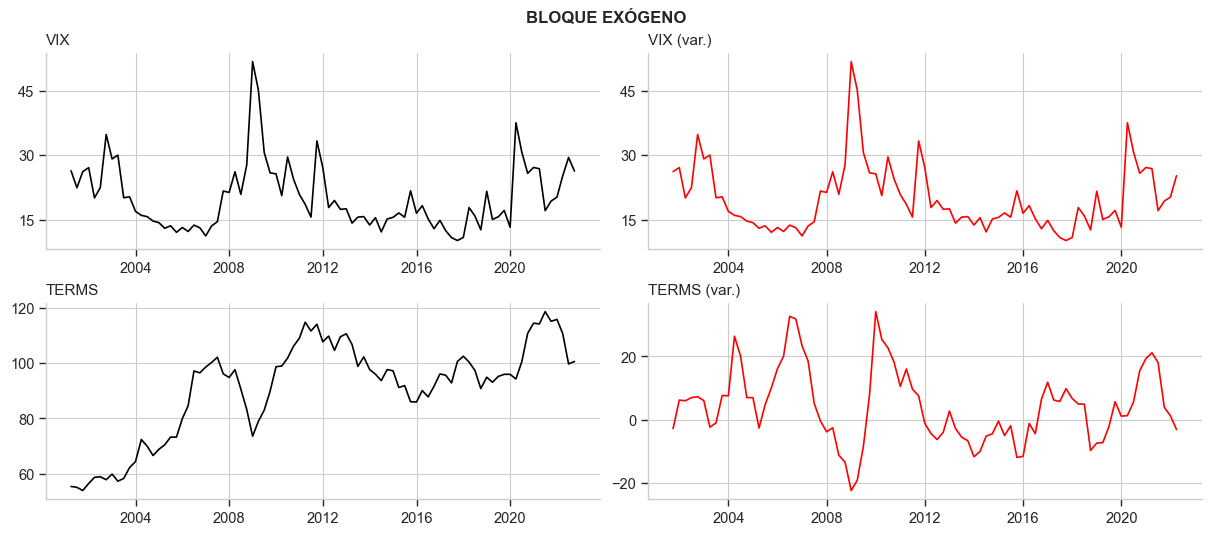

In [66]:
# Estilo sobrio tipo paper
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("paper", font_scale=1.2)

# Definir bloques y variables
bloques = {
    "Bloque exógeno": ["VIX", "TERMS"]
}

# Graficar cada bloque
for nombre_bloque, variables in bloques.items():
    n = len(variables)
    fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(12, 2.5 * n), constrained_layout=True)

    if n == 1:
        axes = [axes]  # Para mantener compatibilidad cuando n=1

    for i, var in enumerate(variables):
        # Nivel
        axes[i][0].plot(niveles.index, niveles[var], color='black', linewidth=1.2)
        axes[i][0].set_title(f"{var}", loc='left', fontsize=11)
        axes[i][0].tick_params(axis='x', labelrotation=0)
        axes[i][0].spines[['top', 'right']].set_visible(False)

        # Variación
        axes[i][1].plot(variaciones.index, variaciones[var], color='red', linewidth=1.2)
        axes[i][1].set_title(f"{var} (var.)", loc='left', fontsize=11)
        axes[i][1].tick_params(axis='x', labelrotation=0)
        axes[i][1].spines[['top', 'right']].set_visible(False)

        # Mejorar legibilidad en eje y
        for ax in axes[i]:
            ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=4))

    # Título del bloque
    fig.suptitle(nombre_bloque.upper(), fontsize=12, fontweight='bold', y=1.04)
    plt.show()


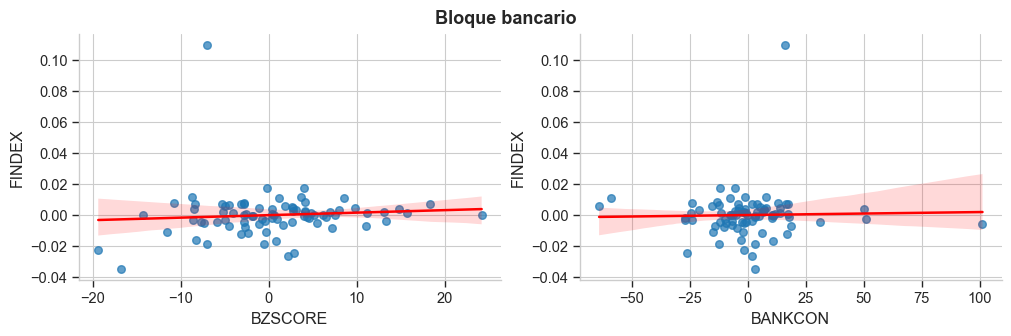

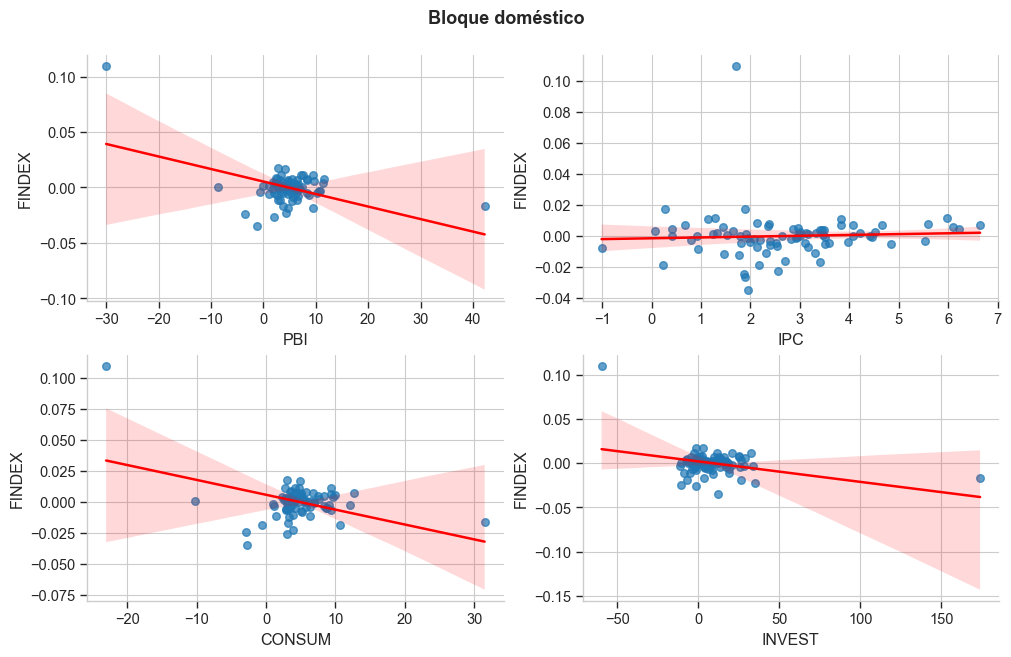

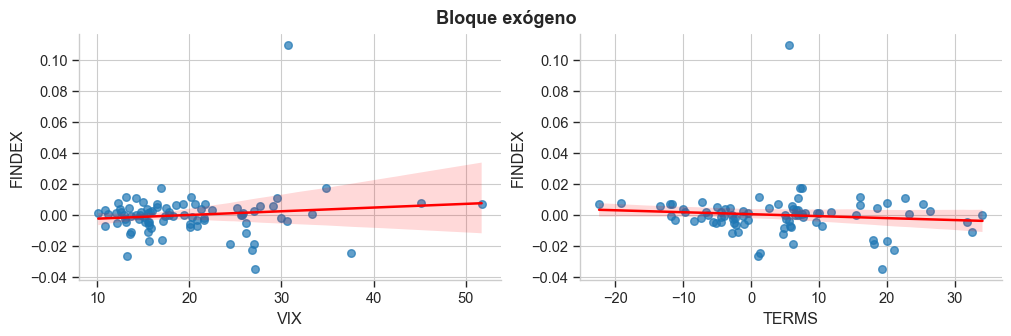

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo sobrio
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("paper", font_scale=1.2)

# Definición de bloques
bloques = {
    "Bloque bancario": ["BZSCORE", "BANKCON"],
    "Bloque doméstico": ["PBI", "IPC", "CONSUM", "INVEST"],
    "Bloque exógeno": ["VIX", "TERMS"]
}

# Variable dependiente
var_ref = "FINDEX"

# Gráfico por bloque
for nombre_bloque, variables in bloques.items():
    n = len(variables)
    ncols = 2
    nrows = (n + 1) // ncols  # número de filas necesarias
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 3 * nrows), constrained_layout=True)
    axes = axes.flatten()  # para indexar fácilmente

    for i, var in enumerate(variables):
        sns.regplot(x=variaciones[var], y=variaciones[var_ref], ax=axes[i],
                    scatter_kws={'s': 30, 'alpha': 0.7}, line_kws={'color': 'red'})
        axes[i].set_xlabel(var)
        axes[i].set_ylabel(var_ref)
        # axes[i].set_title(f'{var_ref} vs {var}', loc='left', fontsize=11)
        axes[i].spines[['top', 'right']].set_visible(False)

    # Eliminar ejes vacíos si los hay
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Título del bloque
    fig.suptitle(f"{nombre_bloque}", fontsize=13, fontweight='bold', y=1.07)
    plt.show()



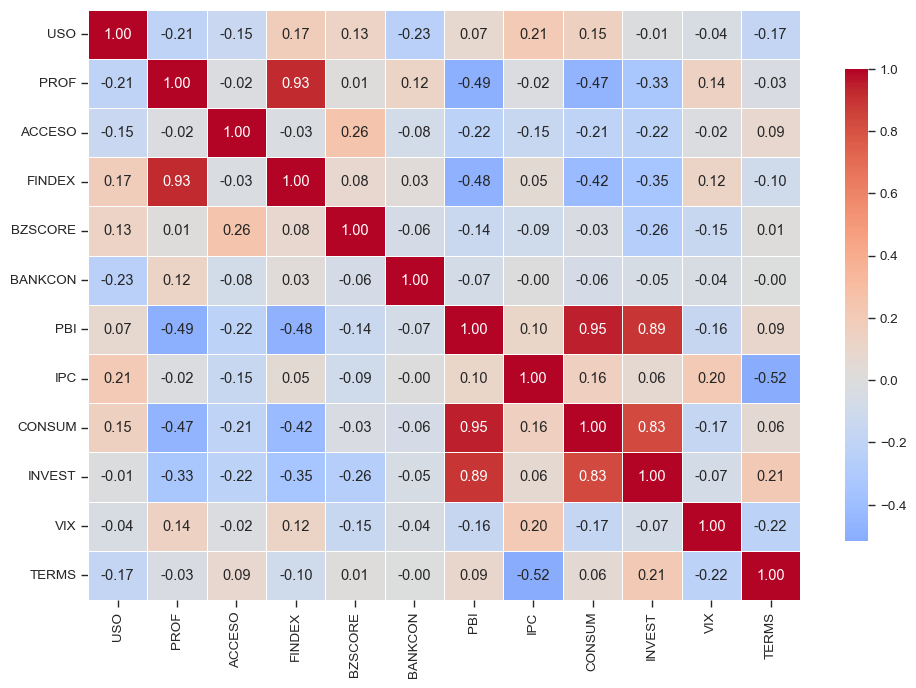

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo sobrio
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("paper", font_scale=1.1)

# Calcular matriz de correlaciones
matriz_corr = variaciones.corr()

# Crear mapa de calor
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap="coolwarm", center=0,
            linewidths=0.5, cbar_kws={"shrink": 0.8})

# Título
# plt.title("Mapa de calor de correlaciones entre variaciones", fontsize=13, fontweight='bold', loc='left')

# Fuente
# plt.figtext(0.5, -0.02, 'Fuente: BCRP y SBS\nElaboración Propia',
#            ha='center', va='center', fontsize=9, style='italic')

plt.tight_layout()
plt.show()


# Filtro de Hamilton

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [33]:
# ---------- Función del filtro de Hamilton ----------
def hamilton_filter(series, h=4, p=2):
    """
    Aplica el filtro de Hamilton a una serie temporal univariada.

    series: pd.Series con índice temporal
    h: horizonte futuro
    p: rezagos
    Retorna: tendencia, ciclo
    """
    series = series.dropna()
    T = len(series)
    X = pd.concat([series.shift(i) for i in range(h, h + p)], axis=1)
    X.columns = [f'lag_{i}' for i in range(h, h + p)]
    X = sm.add_constant(X)
    y = series.shift(-h)
    df = pd.concat([y, X], axis=1).dropna()
    y_clean = df.iloc[:, 0]
    X_clean = df.iloc[:, 1:]
    model = sm.OLS(y_clean, X_clean).fit()
    trend = model.fittedvalues
    cycle = y_clean - trend
    return trend, cycle

In [34]:
# ---------- Cargar datos ----------
file_path = "C:/Users/gabri/OneDrive/Desktop/Cato/Tesis/Tesis-paper/Data y gráficos/PCA/Data Hamilton.xlsx"
df = pd.read_excel(file_path)

# La primera columna es fecha
df.set_index(df.columns[0], inplace=True)

# Crear DataFrames para guardar resultados
trend_df = pd.DataFrame(index=df.index)
cycle_df = pd.DataFrame(index=df.index)

# Aplicar filtro a cada variable
for col in df.columns:
    trend, cycle = hamilton_filter(df[col])
    trend_df[col] = trend
    cycle_df[col] = cycle

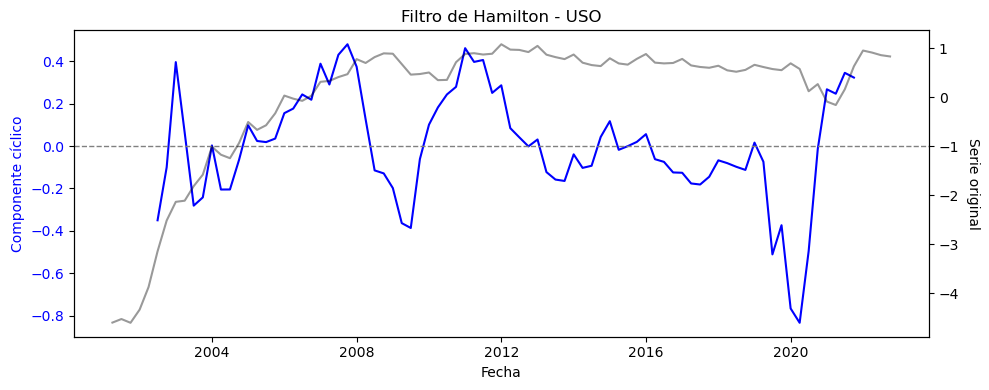

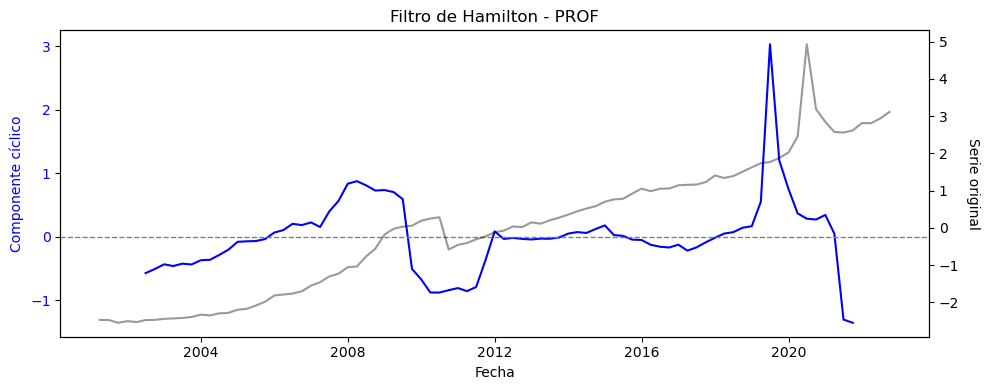

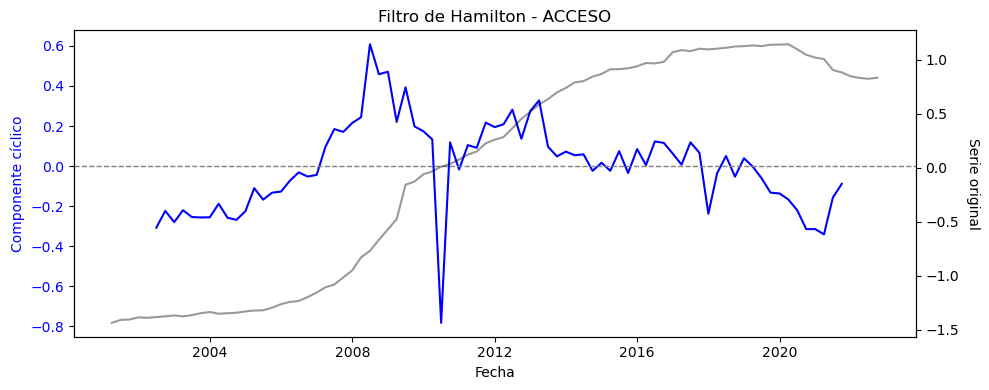

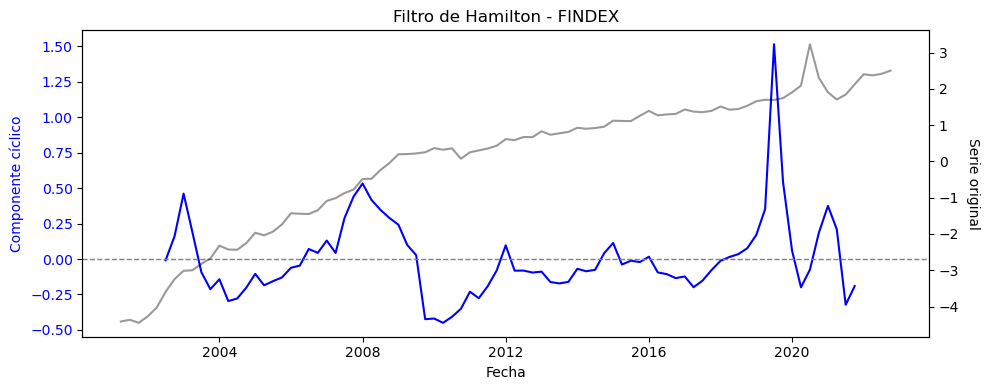

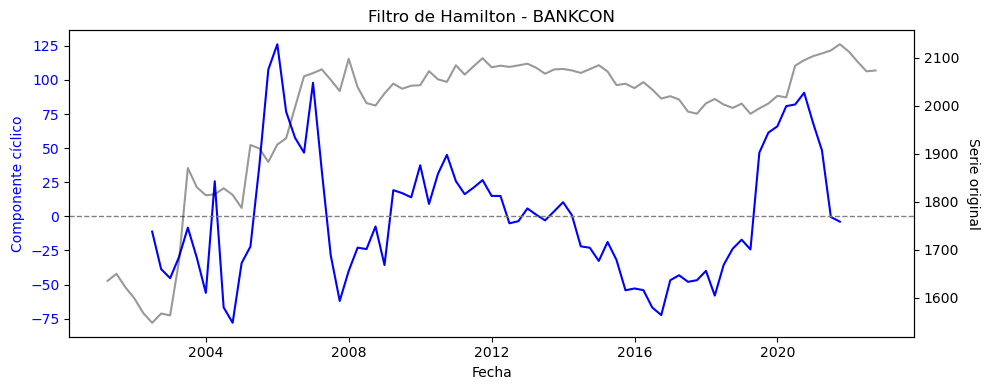

In [35]:
# ---------- Graficar con doble eje ----------
for col in cycle_df.columns:
    fig, ax1 = plt.subplots(figsize=(10, 4))

    ax1.set_title(f'Filtro de Hamilton - {col}')
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('Componente cíclico', color='blue')
    ax1.plot(cycle_df.index, cycle_df[col], color='blue', label='Ciclo')
    ax1.axhline(0, color='gray', linestyle='--', linewidth=1)
    ax1.tick_params(axis='y', labelcolor='blue')

    # Segundo eje para la serie original
    ax2 = ax1.twinx()
    ax2.set_ylabel('Serie original', color='black', rotation=270, labelpad=15)
    ax2.plot(df.index, df[col], color='black', alpha=0.4, label='Original')
    ax2.tick_params(axis='y', labelcolor='black')

    fig.tight_layout()
    plt.show()

In [36]:
cycle_df

,USO,PROF,ACCESO,FINDEX,BANKCON
Fecha,,,,,
2001-03-31,NaN,NaN,NaN,NaN,NaN
2001-06-30,NaN,NaN,NaN,NaN,NaN
2001-09-30,NaN,NaN,NaN,NaN,NaN
2001-12-31,NaN,NaN,NaN,NaN,NaN
2002-03-31,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2021-09-30,0.322682,-1.355804,-0.088557,-0.191014,-3.862966
2021-12-31,NaN,NaN,NaN,NaN,NaN
2022-03-31,NaN,NaN,NaN,NaN,NaN


In [38]:
cycle_df.to_excel("C:/Users/gabri/OneDrive/Desktop/Cato/Tesis/Tesis-paper/Data y gráficos/PCA/Datos Hamilton sin tendencia.xlsx", index=True)

# Modelo VAR preliminar

In [40]:
from statsmodels.tsa.api import VAR
import pandas as pd

In [48]:
file_path = "C:/Users/gabri/OneDrive/Desktop/Cato/Tesis/Tesis-paper/Data y gráficos/Data Decomp norm.xlsx"
df = pd.read_excel(file_path)
df.set_index(df.columns[0], inplace=True)

model = VAR(df)

# Seleccionar el rezago óptimo
lag_selection = model.select_order(maxlags=4)  # puedes ajustar el máximo según tus datos
print(lag_selection.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0     -43.69*     -43.33*  1.059e-19*     -43.55*
1      -18.30      -13.62   1.174e-08      -16.42
2      -21.75      -12.75   4.700e-10      -18.14
3      -22.66      -9.347   3.715e-10      -17.33
4      -23.05      -5.411   1.222e-09      -15.98
-------------------------------------------------


c:\Users\gabri\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


In [44]:
from statsmodels.tsa.stattools import adfuller, kpss

In [52]:
# Ruta al archivo
file_path = "C:/Users/gabri/OneDrive/Desktop/Cato/Tesis/Tesis-paper/Data y gráficos/Data Decomp norm.xlsx"

# Cargar datos
df = pd.read_excel(file_path, parse_dates=[0], index_col=0)

# Función para aplicar pruebas
def test_stationarity(series, name):
    print(f"\n--- Resultados para {name} ---")
    
    # ADF Test
    adf_result = adfuller(series.dropna())
    print(f"ADF test: p-valor = {adf_result[1]:.4f} -> {'Rechaza H0 (Estacionaria)' if adf_result[1] < 0.05 else 'No rechaza H0 (No estacionaria)'}")
    
    # KPSS Test
    try:
        kpss_result = kpss(series.dropna(), regression='c', nlags='auto')
        print(f"KPSS test: p-valor = {kpss_result[1]:.4f} -> {'Rechaza H0 (No estacionaria)' if kpss_result[1] < 0.05 else 'No rechaza H0 (Estacionaria)'}")
    except:
        print("KPSS test falló (posiblemente serie muy corta)")

# Aplicar a cada columna
for col in df.columns:
    test_stationarity(df[col], col)


--- Resultados para USO ---
ADF test: p-valor = 0.0000 -> Rechaza H0 (Estacionaria)
KPSS test: p-valor = 0.1000 -> No rechaza H0 (Estacionaria)

--- Resultados para PROF ---
ADF test: p-valor = 0.0000 -> Rechaza H0 (Estacionaria)
KPSS test: p-valor = 0.0417 -> Rechaza H0 (No estacionaria)

--- Resultados para ACCESO ---
ADF test: p-valor = 0.0000 -> Rechaza H0 (Estacionaria)
KPSS test: p-valor = 0.1000 -> No rechaza H0 (Estacionaria)

--- Resultados para FINDEX ---
ADF test: p-valor = 0.0000 -> Rechaza H0 (Estacionaria)
KPSS test: p-valor = 0.1000 -> No rechaza H0 (Estacionaria)

--- Resultados para BZSCORE ---
ADF test: p-valor = 0.0445 -> Rechaza H0 (Estacionaria)
KPSS test: p-valor = 0.1000 -> No rechaza H0 (Estacionaria)

--- Resultados para BANKCON ---
ADF test: p-valor = 0.0000 -> Rechaza H0 (Estacionaria)
KPSS test: p-valor = 0.0417 -> Rechaza H0 (No estacionaria)

--- Resultados para PBI ---
ADF test: p-valor = 0.5088 -> No rechaza H0 (No estacionaria)
KPSS test: p-valor = 0.1

C:\Users\gabri\AppData\Local\Temp\ipykernel_51476\2365264088.py:17: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series.dropna(), regression='c', nlags='auto')
C:\Users\gabri\AppData\Local\Temp\ipykernel_51476\2365264088.py:17: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series.dropna(), regression='c', nlags='auto')
C:\Users\gabri\AppData\Local\Temp\ipykernel_51476\2365264088.py:17: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series.dropna(), regression='c', nlags='auto')
C:\Users\gabri\AppData\Local\Temp\ipykernel_51476\2365264088.py:17: InterpolationWarning: T

In [55]:
# Ruta al archivo
file_path = "C:/Users/gabri/OneDrive/Desktop/Cato/Tesis/Tesis-paper/Data y gráficos/Data final Hamilton norm.xlsx"

# Cargar datos
df = pd.read_excel(file_path, parse_dates=[0], index_col=0)

# Función para aplicar pruebas
def test_stationarity(series, name):
    print(f"\n--- Resultados para {name} ---")
    
    # ADF Test
    adf_result = adfuller(series.dropna())
    print(f"ADF test: p-valor = {adf_result[1]:.4f} -> {'Rechaza H0 (Estacionaria)' if adf_result[1] < 0.05 else 'No rechaza H0 (No estacionaria)'}")
    
    # KPSS Test
    try:
        kpss_result = kpss(series.dropna(), regression='c', nlags='auto')
        print(f"KPSS test: p-valor = {kpss_result[1]:.4f} -> {'Rechaza H0 (No estacionaria)' if kpss_result[1] < 0.05 else 'No rechaza H0 (Estacionaria)'}")
    except:
        print("KPSS test falló (posiblemente serie muy corta)")

# Aplicar a cada columna
for col in df.columns:
    test_stationarity(df[col], col)


--- Resultados para USO ---
ADF test: p-valor = 0.0297 -> Rechaza H0 (Estacionaria)
KPSS test: p-valor = 0.1000 -> No rechaza H0 (Estacionaria)

--- Resultados para PROF ---
ADF test: p-valor = 0.0002 -> Rechaza H0 (Estacionaria)
KPSS test: p-valor = 0.1000 -> No rechaza H0 (Estacionaria)

--- Resultados para ACCESO ---
ADF test: p-valor = 0.1037 -> No rechaza H0 (No estacionaria)
KPSS test: p-valor = 0.1000 -> No rechaza H0 (Estacionaria)

--- Resultados para FINDEX ---
ADF test: p-valor = 0.0030 -> Rechaza H0 (Estacionaria)
KPSS test: p-valor = 0.1000 -> No rechaza H0 (Estacionaria)

--- Resultados para BZSCORE ---
ADF test: p-valor = 0.0591 -> No rechaza H0 (No estacionaria)
KPSS test: p-valor = 0.1000 -> No rechaza H0 (Estacionaria)

--- Resultados para BANKCON ---
ADF test: p-valor = 0.0395 -> Rechaza H0 (Estacionaria)
KPSS test: p-valor = 0.1000 -> No rechaza H0 (Estacionaria)

--- Resultados para PBI ---
ADF test: p-valor = 0.6734 -> No rechaza H0 (No estacionaria)
KPSS test: p

C:\Users\gabri\AppData\Local\Temp\ipykernel_51476\3572814448.py:17: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series.dropna(), regression='c', nlags='auto')
C:\Users\gabri\AppData\Local\Temp\ipykernel_51476\3572814448.py:17: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series.dropna(), regression='c', nlags='auto')
C:\Users\gabri\AppData\Local\Temp\ipykernel_51476\3572814448.py:17: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series.dropna(), regression='c', nlags='auto')
C:\Users\gabri\AppData\Local\Temp\ipykernel_51476\3572814448.py:17: InterpolationWarning: T

# Transformamos algunos datos para añadir mas indicadores de IF

In [28]:
import pandas as pd
import numpy as np

# Cargar datos
df = pd.read_excel("C:/Users/gabri/OneDrive/Desktop/Cato/Tesis/Tesis-paper/Data y gráficos/Data poblacion.xlsx")

# 2. Convertir la columna 'Año' a un índice tipo datetime con frecuencia anual
df['Fecha'] = pd.to_datetime(df['year'], format='%Y')
df = df.set_index('Fecha')
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2000-01-01 to 2023-01-01
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   year       24 non-null     int64
 1   poblation  24 non-null     int64
dtypes: int64(2)
memory usage: 576.0 bytes


In [29]:
# Asegurarnos que 'year' es numérico
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Crear fechas con final de año (31 de diciembre)
df['Fecha'] = pd.to_datetime(df['year'], format='%Y') + pd.offsets.YearEnd(0)
df = df.set_index('Fecha')

# Renombrar columna si se llama 'poblation' mal escrita
df.rename(columns={'poblation': 'poblacion'}, inplace=True)

# Creamos columna original y reindexamos a trimestral
df_original = df[['poblacion']].copy()
df_trimestral = df_original.resample('Q').asfreq()

# Interpolamos
df_trimestral['poblacion_estimada'] = df_trimestral['poblacion'].interpolate(method='linear')

# Ahora tenemos ambas columnas
# La columna 'poblacion' tiene solo los valores anuales
# La columna 'poblacion_estimada' tiene todos (anuales + trimestrales interpolados)
df_resultado = df_trimestral.reset_index()
df_resultado 

C:\Users\gabri\AppData\Local\Temp\ipykernel_18956\1209565367.py:13: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_trimestral = df_original.resample('Q').asfreq()


,Fecha,poblacion,poblacion_estimada
0,2000-12-31,14889892.0,14889892.0
1,2001-03-31,NaN,14964028.5
2,2001-06-30,NaN,15038165.0
3,2001-09-30,NaN,15112301.5
4,2001-12-31,15186438.0,15186438.0
...,...,...,...
88,2022-12-31,21854191.0,21854191.0
89,2023-03-31,NaN,21903177.0
90,2023-06-30,NaN,21952163.0
91,2023-09-30,NaN,22001149.0


In [30]:
df_resultado.to_excel("C:/Users/gabri/OneDrive/Desktop/Cato/Tesis/Tesis-paper/Data y gráficos/Data poblacion int.xlsx", index=True)